In [1]:
import os,sys
sys.path.append('./hmvec-master/')
import hmvec as hm # Git clone and pip install as in readme from github.com/msyriac/hmvec
from compute_power_spectra import *
from plotting import *
from params import *
from scipy.optimize import minimize
from scipy.stats import chi2

np_load_old = np.load
np.load     = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


### FIRAS constraint

In [2]:
COBE = np.genfromtxt('./data/FIRAS.txt')

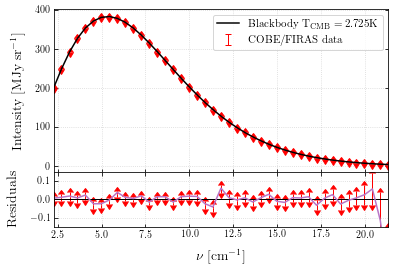

In [3]:
fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)

ax0.errorbar(COBE[:,0], COBE[:,1], yerr=COBE[:,3]*1e-3, color='k', ecolor='r', \
            capthick=1, linewidth=1, fmt='None', uplims=True, lolims=True, label=r'$\rm COBE/FIRAS \; data$')

# data minus residual = blackbody
ax0.plot(COBE[:,0], COBE[:,1]-COBE[:,2]*1e-3, color='k', label=r'$\rm Blackbody \; T_{\rm CMB} = 2.725K$')

ax1.errorbar(COBE[:,0], COBE[:,1]-BBf(frq(COBE[:,0])))

ax1.errorbar(COBE[:,0], COBE[:,2]*1e-3, yerr=COBE[:,3]*1e-3, color='k', ecolor='r', \
                        capthick=1, linewidth=1, fmt='None', uplims=True, lolims=True,)

ax0.set_ylabel(r'$\rm Intensity \; [MJy \; sr^{-1}]$')
ax1.set_xlabel(r'$\rm \nu \; [cm^{-1}]$')
ax1.set_ylabel(r'$\rm Residuals$')

ax1.axhline(0, ls='-', color='k', alpha=1, linewidth=1)
ax1.set_ylim((-0.15,0.15))
ax1.set_xlim((COBE[0,0],COBE[-1,0]))

plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

ax0.tick_params(axis="y", direction="in")
ax0.tick_params(axis="x", direction="in")
ax1.tick_params(axis="y", direction="in")
ax1.tick_params(axis="x", direction="in")

ax0.yaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax0.grid(ls=':', color='darkgray', alpha=0.5)
ax1.grid(ls=':', color='darkgray', alpha=0.5)
plt.subplots_adjust(hspace=.0)

ax0.legend()
plt.show()

/home/dpirvu/DarkPhoton/params.py:40: RuntimeWarning: invalid value encountered in divide
  BBf = lambda frq: 1e26/1e6*(2.*frq**3.*hplanck)/cligth**2. / (np.exp(hplanck*frq/kboltzmann/TFIRAS) - 1.)


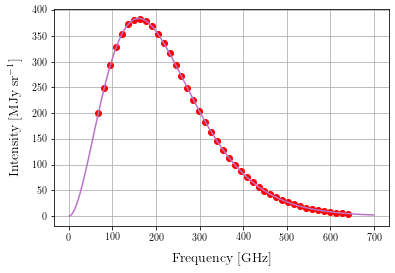

In [4]:
plt.plot(frq(COBE[:,0])/1e9, BBf(frq(COBE[:,0])), 'ro')

freqs = np.linspace(0, 699, 700)
plt.plot(freqs, BBf(freqs*1e9))
plt.xlabel(r'$\rm Frequency \; [GHz]$')
plt.ylabel(r'$\rm Intensity \; [MJy \; sr^{-1}]$')
plt.grid(); plt.show()


In [5]:
frq(COBE[:,0])/1e9

array([ 68.05288797,  81.54354858,  95.33400164, 108.82466225,
       122.31532286, 136.10577593, 149.59643654, 163.38688961,
       176.87755022, 190.36821083, 204.1586639 , 217.64932451,
       231.13998512, 244.93043819, 258.4210988 , 272.21155186,
       285.70221247, 299.19287308, 312.98332615, 326.47398676,
       339.96464737, 353.75510044, 367.24576105, 381.03621412,
       394.52687473, 408.01753534, 421.80798841, 435.29864902,
       448.78930963, 462.57976269, 476.0704233 , 489.86087637,
       503.35153698, 516.84219759, 530.63265066, 544.12331127,
       557.91376434, 571.40442495, 584.89508556, 598.68553863,
       612.17619924, 625.66685985, 639.45731291])

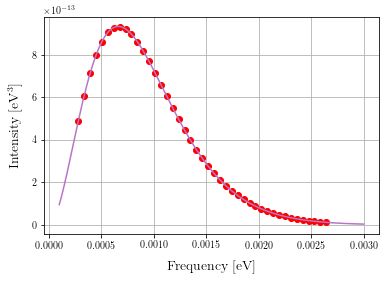

In [6]:
freqs = frq(COBE[:,0]) # Hz
freqs = freqs/1e9 # GHz
freqs = ghztoev(freqs) # eV

plt.plot(freqs, BBω(freqs), 'ro')

freqsext = np.linspace(1e-4, 3e-3, 1000)
plt.plot(freqsext, BBω(freqsext))
plt.xlabel(r'$\rm Frequency \; [eV]$')
plt.ylabel(r'$\rm Intensity \; [eV^3]$')
plt.grid(); plt.show()


In [7]:
# we want the residual of the CMB blackbody to be greater than the screening due to dark photons
# res < ϵ^2 τav T0
freqs = frq(COBE[:,0]) # Hz
freqs = freqs/1e9 # GHz
firasdomainEV = ghztoev(freqs) # eV

FIRASdata = np.zeros(np.shape(COBE))
for cind, col in enumerate([COBE[:,0], COBE[:,1], COBE[:,2], COBE[:,3], COBE[:,4]]):
    if cind==0:
        FIRASdata[:, cind] = firasdomainEV
    if cind==1:
        FIRASdata[:, cind] = col/(1e26/1e6*(2.*frq(COBE[:,0])**3.*hplanck)/cligth**2.) * firasdomainEV**3. / (2.*np.pi**2.)
    else:
        FIRASdata[:, cind] = col/(1e26/1e3*(2.*frq(COBE[:,0])**3.*hplanck)/cligth**2.) * firasdomainEV**3. / (2.*np.pi**2.)


In [8]:
MAMWlimit = np.load('./data/MWmassconstraint.npy')
MAMW_rscalelimit = np.load('./data/MWrscale_massconstraint.npy')
rscaleMW = np.load('./data/MWscaleradius.npy')


No handles with labels found to put in legend.


8.148754173103232e-12


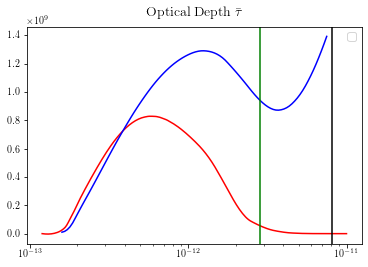

In [9]:
masss, loadedGAS = np.load('./data/fullmonopole_gas_z6.npy')
plt.plot(masss, loadedGAS, 'r')

masss_NFW, loadedNFW = np.load('./data/fullmonopole_NFW_z6.npy')
plt.plot(masss_NFW, loadedNFW, 'b')

print(MAMWlimit)
plt.axvline(MAMW_rscalelimit, color='g')
plt.axvline(MAMWlimit, color='k')

plt.title(r'$\rm Optical \; Depth \; \bar{\tau}$')
plt.xscale('log'); plt.legend(); plt.show()


No handles with labels found to put in legend.


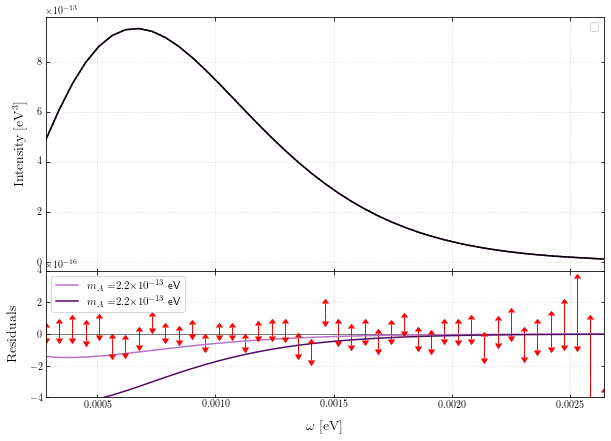

In [10]:
def plot_residual(xdata, ydata, resdata, mind0, mind, ax0, ax1):
    ax0.grid(ls=':', color='darkgray', alpha=0.5); ax1.grid(ls=':', color='darkgray', alpha=0.5)
    ax1.axhline(0, ls='-', color='k', alpha=0.5, linewidth=1)

    for vv, vec in enumerate(ydata):
        ax0.plot(xdata, vec, ls=(':' if vv!=0 else '-'))
    for vv, vec in enumerate(resdata):
        lab = r'$m_A=${} eV'.format(fmt(masss[mind0])) if vv==0 else r'$m_A=${} eV'.format(fmt(masss[mind]))
        ax1.plot(xdata, vec, label=lab)
    plt.setp(ax0.get_xticklabels(), visible=False)
    yticks = ax1.yaxis.get_major_ticks(); yticks[-1].label1.set_visible(False)

    ax0.tick_params(axis="y", direction="in"); ax1.tick_params(axis="y", direction="in")
    ax0.tick_params(axis="x", direction="in"); ax1.tick_params(axis="x", direction="in")
    ax0.yaxis.set_ticks_position('both'); ax1.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both'); ax1.xaxis.set_ticks_position('both')

    ax1.set_xlabel(r'$\rm \omega \; [eV]$'); ax0.set_ylabel(r'$\rm Intensity \; [eV^3]$')
    ax1.set_ylabel(r'$\rm Residuals$'); ax0.legend(); ax1.legend()
    return fig

fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
plt.subplots_adjust(hspace=.0)
ax0 = plt.subplot(gs[0]); ax1 = plt.subplot(gs[1], sharex = ax0)


mind0 = 27
mind = 27
epsilon = 1.5e-6
baseline = ghztoev(30)

distGAS = epsilon**2. * loadedGAS[mind0] * baseline / firasdomainEV
distNFW = epsilon**2. * loadedNFW[mind] * baseline / firasdomainEV
screenedGAS = BBω(firasdomainEV) * (1. - distGAS)
screenedNFW = BBω(firasdomainEV) * (1. - distNFW)

null = FIRASdata[:,1] - FIRASdata[:,1]
δIGAS = screenedGAS - BBω(firasdomainEV)
δINFW = screenedNFW - BBω(firasdomainEV)

plot_residual(firasdomainEV, [screenedGAS, screenedNFW], [δIGAS, δINFW], mind0, mind, ax0, ax1)

ax0.plot(firasdomainEV, FIRASdata[:,1], color='k', label=r'$\rm Blackbody \; T_{\rm CMB} = 2.725K$')
ax1.errorbar(firasdomainEV, FIRASdata[:,2], yerr=FIRASdata[:,3], color='k', ecolor='r', \
                        capthick=1, linewidth=1, fmt='None', uplims=True, lolims=True,)

ax1.set_xlim((firasdomainEV[0],firasdomainEV[-1]))
ax1.set_ylim((-0.4e-15,0.4e-15))
plt.show()


In [11]:
#eplist = list(set(np.geomspace(4e-6, 1e-5, 200).tolist() + np.linspace(1e-5, 1e-4, 50).tolist()))
#eplist = np.concatenate((np.linspace(1.4e-6, 9e-6, 50), np.linspace(9e-6, 1e-4, 10)[1:]), axis=0)
eplist = np.geomspace(1.7e-6, 1e-3, 500)

scrGAS = np.zeros((len(masss), len(eplist), len(COBE)))
scrNFW = np.zeros((len(masss_NFW), len(eplist), len(COBE)))

BBωT = lambda T, omg: (omg**3.)/(2.*np.pi**2.) / (np.exp(omg/K2eV(T)) - 1.)

for mind, MA in enumerate(masss):
    for eind, epsilon in enumerate(eplist):
        scrGAS[mind,eind] = epsilon**2. * loadedGAS[mind] * baseline / firasdomainEV

for mind, MA in enumerate(masss_NFW):
    for eind, epsilon in enumerate(eplist):
        scrNFW[mind,eind] = epsilon**2. * loadedNFW[mind] * baseline / firasdomainEV


In [12]:
Ndof = len(COBE)-1

chisqfid = lambda T:             Ndof**-1.*np.sum(((FIRASdata[:,1] - BBωT(T, firasdomainEV)                       )/FIRASdata[:,3])**2.)
chisqGAS = lambda T, mind, eind: Ndof**-1.*np.sum(((FIRASdata[:,1] - BBωT(T, firasdomainEV)*(1.-scrGAS[mind,eind]))/FIRASdata[:,3])**2.)
chisqNFW = lambda T, mind, eind: Ndof**-1.*np.sum(((FIRASdata[:,1] - BBωT(T, firasdomainEV)*(1.-scrNFW[mind,eind]))/FIRASdata[:,3])**2.)

resnull = minimize(chisqfid, x0=TFIRAS, method='Powell', tol=1e-6)
chisq0 = chisqfid(TFIRAS)
print(TFIRAS, resnull.x, chisqfid(TFIRAS), resnull.fun)


2.725 [2.72501553] 1.1736806171818355 1.0737243313352158


In [13]:
gofdataGAS = np.zeros((len(masss), len(eplist)))
gofdataNFW = np.zeros((len(masss_NFW), len(eplist)))

for mind, MA in enumerate(masss):
    for eind, epsilon in enumerate(eplist):
        resGAS = minimize(chisqGAS, args=(mind, eind), x0=TFIRAS, method='Powell', tol=1e-6)
        gofdataGAS[mind,eind] = resGAS.fun

for mind, MA in enumerate(masss_NFW):
    for eind, epsilon in enumerate(eplist):
        resNFW = minimize(chisqNFW, args=(mind, eind), x0=TFIRAS, method='Powell', tol=1e-6)
        gofdataNFW[mind,eind] = resNFW.fun


/tmp/ipykernel_26315/1639062455.py:8: RuntimeWarning: overflow encountered in exp
  BBωT = lambda T, omg: (omg**3.)/(2.*np.pi**2.) / (np.exp(omg/K2eV(T)) - 1.)
IOStream.flush timed out
IOStream.flush timed out


In [18]:
bound1 = chi2.ppf(q=0.95, df=Ndof)
bound2 = chi2.ppf(q=0.99, df=Ndof)
print(bound1, bound2)

x = masss
y = eplist
xx, yy = np.meshgrid(x, y)

xNFW = masss_NFW
yNFW = eplist
xxNFW, yyNFW = np.meshgrid(xNFW, yNFW)

58.12403768086803 66.20623628399322


In [15]:
contGAS95 = (np.ones(np.shape(gofdataGAS))*(gofdataGAS <= bound1))
contGAS99 = (np.ones(np.shape(gofdataGAS))*(gofdataGAS <= bound2))

for mind, row in enumerate(contGAS95):
    ind = np.nonzero(contGAS95[mind])[0][-1]
    contGAS95[mind,:ind] = 0.

for mind, row in enumerate(contGAS99):
    ind = np.nonzero(contGAS99[mind])[0][-1]
    contGAS99[mind,:ind] = 0.

In [16]:
contNFW95 = (np.ones(np.shape(gofdataNFW))*(gofdataNFW <= bound1))
contNFW99 = (np.ones(np.shape(gofdataNFW))*(gofdataNFW <= bound2))

for mind, row in enumerate(contNFW95):
    ind = np.nonzero(contNFW95[mind])[0][-1]
    contNFW95[mind,:ind] = 0.

for mind, row in enumerate(contNFW99):
    ind = np.nonzero(contNFW99[mind])[0][-1]
    contNFW99[mind,:ind] = 0.

/tmp/ipykernel_26315/4012209617.py:4: UserWarning: The following kwargs were not used by contour: 'aspect'
  im1 = ax[0].contourf(xxNFW, yyNFW, contNFW95.T, aspect='auto', origin='lower', cmap='BrBG_r')
/tmp/ipykernel_26315/4012209617.py:6: UserWarning: The following kwargs were not used by contour: 'aspect'
  im1 = ax[1].contourf(xx, yy, contGAS95.T, aspect='auto', origin='lower', cmap='BrBG_r')


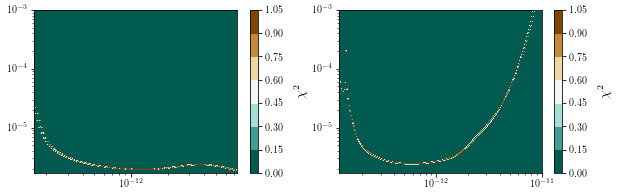

In [19]:
test = True
if test:
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    im1 = ax[0].contourf(xxNFW, yyNFW, contNFW95.T, aspect='auto', origin='lower', cmap='BrBG_r')
    plt.colorbar(im1, ax=ax[0], label=r'$\chi^2$')
    im1 = ax[1].contourf(xx, yy, contGAS95.T, aspect='auto', origin='lower', cmap='BrBG_r')
    plt.colorbar(im1, ax=ax[1], label=r'$\chi^2$')

    for axx in ax:
        axx.set_xscale('log'); axx.set_yscale('log')
    plt.show()

In [24]:
from scipy.ndimage import gaussian_filter1d

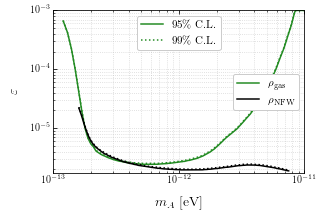

In [25]:
fig, ax = plt.subplots(1,1, figsize = (4.5,3))
secondary_lines, secondary_labels = [], []
for ind, reio in enumerate([contGAS95, contGAS99, contNFW95, contNFW99]):
    lss = ['-', ':'][np.divmod(ind, 2)[1]]
    lab = ([r'$95\% \; \rm C.L.$', r'$99\% \; \rm C.L.$'][np.divmod(ind, 2)[1]] if np.divmod(ind, 2)[0]==0 else None)

    if ind<2:
        oldx1 = x[np.argwhere(reio.T>0.)[:,1]]
        cords1 = np.argsort(oldx1)
        oldy1 = y[np.argwhere(reio.T>0.)[:,0]][cords1]
        oldx1 = oldx1[cords1]
    else:
        oldx1 = xNFW[np.argwhere(reio.T>0.)[:,1]]
        cords1 = np.argsort(oldx1)
        oldy1 = yNFW[np.argwhere(reio.T>0.)[:,0]][cords1]
        oldx1 = oldx1[cords1]

    fint1 = interpolate.interp1d(oldx1, oldy1, kind='slinear')
    newx1 = np.linspace(oldx1[0], oldx1[-1], 1000)
    fint = fint1(newx1)
    newx = newx1

    if ind<2: fint = np.array(gaussian_filter1d(fint[:10], 1.5, mode='nearest').tolist() + fint[10:].tolist())
    l1, = plt.plot(newx, fint, color=['forestgreen', 'k'][np.divmod(ind, 2)[0]], ls=lss, label=lab)

    if ind==2:
        np.save('./data/NFW_contour.npy', [newx, fint])
    elif ind==0:
        np.save('./data/gas_contour.npy', [newx, fint])

    if np.divmod(ind, 2)[1]==0:
        lab1 = [r'$\rho_{\rm gas}$', r'$\rho_{\rm NFW}$'][np.divmod(ind, 2)[0]]
        secondary_labels.append(lab1)
        secondary_lines.append(l1)

ax.add_artist(plt.legend(secondary_lines, secondary_labels, fancybox=True, framealpha=1, loc='center right'))

plt.xlim((1e-13, 1e-11))
plt.ylim((1.7e-6, 1e-3))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\varepsilon$')
ax.set_xlabel(r'$m_A \; [{\rm eV}]$')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
plt.grid(ls=':', color='darkgray', which='both', alpha=0.5)
plt.legend(fancybox=True, framealpha=1, loc='best')
plt.savefig('./plots/comparison_firascontour.pdf', rasterize=True)
plt.show()


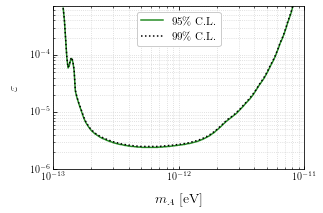

In [26]:
fig, ax = plt.subplots(1,1, figsize = (4.5,3))
for ind, reio in enumerate([contGAS95, contGAS99]):
    lss = ['-', ':'][np.divmod(ind, 2)[1]]
    cl  = ['forestgreen', 'k'][np.divmod(ind, 2)[1]]
    lab = ([r'$95\% \; \rm C.L.$', r'$99\% \; \rm C.L.$'][np.divmod(ind, 2)[1]] if np.divmod(ind, 2)[0]==0 else None)

    oldx1 = x[np.argwhere(reio.T>0.)[:,1]]
    cords1 = np.argsort(oldx1)
    oldx1 = oldx1[cords1]
    oldy1 = y[np.argwhere(reio.T>0.)[:,0]][cords1]

    fint1 = oldy1#interpolate.interp1d(oldx1, oldy1, kind='slinear')
    newx1 = oldx1#np.linspace(oldx1[0], oldx1[-1], 100)

    fint1 = np.array(gaussian_filter1d(fint1[:10], 1.5, mode='nearest').tolist() + fint1[10:].tolist())
    l1, = plt.plot(newx1, fint1, color=cl, ls=lss, label=lab)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\varepsilon$')
ax.set_xlabel(r'$m_A \; [{\rm eV}]$')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('both')
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")

ymin, ymax = ax.get_ylim()
ax.set_ylim((1e-6, 7e-4))
ax.set_xlim((1e-13, 1e-11))

plt.grid(ls=':', color='darkgray', which='both', alpha=0.5)
plt.legend(fancybox=True, framealpha=1, loc='best')
plt.savefig('./plots/gas_firascontour.pdf', rasterize=True)
plt.show()
